In [1]:
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import scipy.stats as stats
import pandas as pd
from matplotlib.lines import Line2D

import seaborn as sns; sns.set_theme(color_codes=True)

from scipy.stats import pearsonr
import numpy as np
import os, stat

import pickle
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
def plot_moca_vs_feature(features_df, cognitive_scores_df, demographics_df, y_axis_label, regressor_label, classes_to_include, figsize=(6, 6), dot_size=2, line_width=3, label_fontsize=16):
    """
    Plots the cross-sectional scatter plot of MoCA scores against a given feature, colored by participant class.
    Regression is shown and controlled for demographics. Only includes specified classes.
    """
    # Merge and filter data
    merged_data = features_df.merge(cognitive_scores_df, on='ID').merge(demographics_df, on='ID')
    merged_data['Class'] = merged_data['Class'].replace({'ADNoEp': 'AD-NoEp', 'ADEp': 'AD-Ep'})
    merged_data = merged_data[merged_data['Class'].isin(classes_to_include)]

    # Set plot parameters
    sns.set_theme(style='white')
    plt.figure(figsize=figsize)

    # Plot each class
    class_colors = {"HC": "#2E8B57", "AD-NoEp": "#00bfff", "AD-Ep": "#000080"}
    for class_name in classes_to_include:
        color = class_colors.get(class_name, "#000000")  # Default to black if class not in color dict
        subset = merged_data[merged_data['Class'] == class_name]
        plt.scatter(subset[regressor_label], subset[y_axis_label], color=color, label=class_name, s=dot_size)

    # Regression analysis
    relevant_cols = ['Age', 'Sex', 'Education', 'ID', regressor_label, y_axis_label, 'Class']
    regression_data = merged_data[relevant_cols].dropna()
    fit = ols(f'MoCA ~ {regressor_label} + C(Sex) + Education + Age', data=regression_data).fit()
    slope, intercept, r_value, _, _ = stats.linregress(merged_data[regressor_label], merged_data[y_axis_label])
    r_value = np.sqrt(fit.rsquared) * (-1 if slope < 0 else 1)

    # Plot regression line
    sns.regplot(x=regressor_label, y=y_axis_label, data=merged_data, scatter=False,
                line_kws={'color': 'black', 'label': f'R = {r_value:.3f}, p = {fit.f_pvalue:.3f}', 'linewidth': line_width}, ci=95)

    # Configure legend
    scatter_handles = [Line2D([0], [0], color=class_colors.get(class_name, "#000000"), marker='o', linestyle='', markersize=np.sqrt(dot_size)) for class_name in classes_to_include]
    legend_line = Line2D([0], [0], color='black', lw=line_width)
    scatter_handles.append(legend_line)
    legend_labels = classes_to_include + [f'R = {r_value:.3f}, p = {fit.f_pvalue:.3f}']
    plt.legend(scatter_handles, legend_labels, fontsize=label_fontsize)

    # Final plot settings
    plt.xlabel(regressor_label, fontsize=label_fontsize)
    plt.ylabel(y_axis_label, fontsize=label_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    sns.despine()
    plt.show()

In [3]:
# Load data from previous run
def load_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

features = load_data('./features_v6.pickle')

In [4]:
# Subjects to remove
ids_to_remove = ['ADEX_025', 'ADEX_103', 'ADEX_084', 'ADEX_080',
              'ADEX_079', 'ADEX_068', 'ADEX_048']

# Assuming 'features' is your dictionary
for key in features.keys():
    features[key] = features[key][~features[key]['ID'].isin(ids_to_remove)]

In [5]:
# MoCA cross-sectional analysis
# Load patients who had MoCA scores within 1 year of their EEG
cog_df = pd.read_csv('./only_moca.csv')
# Load demographic data
demographics_table = pd.read_csv('./ADEX_demo.csv')

1_delta


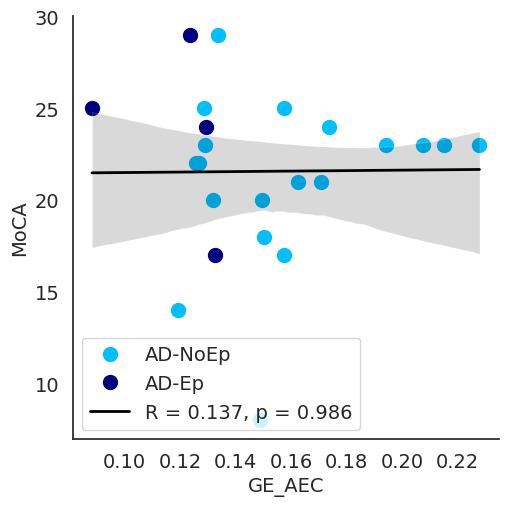

1_theta


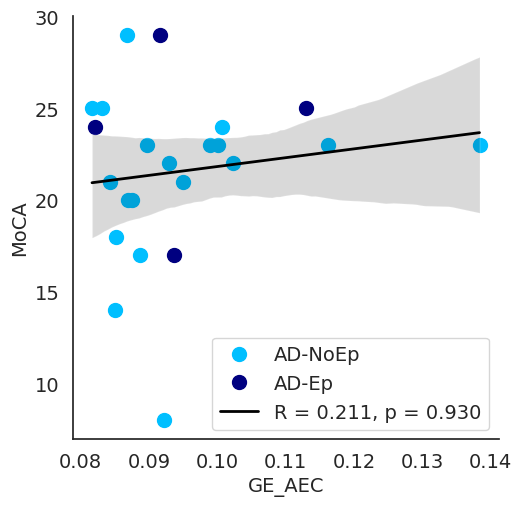

1_alpha


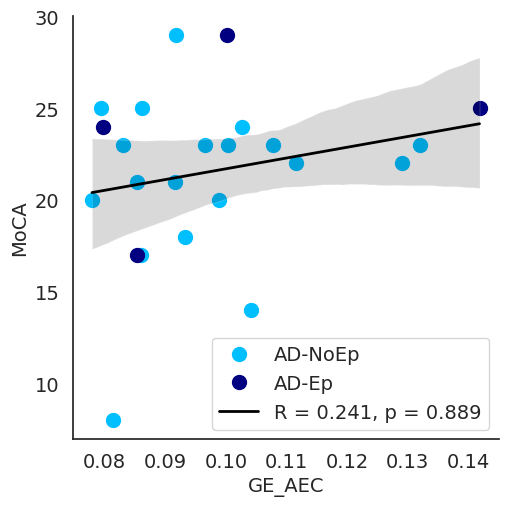

1_beta


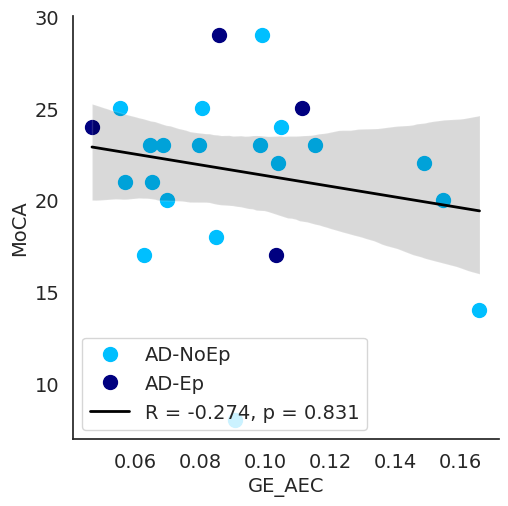

1_gamma


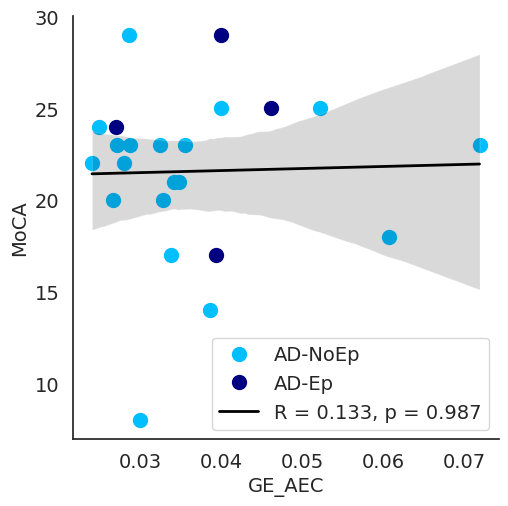

3_delta


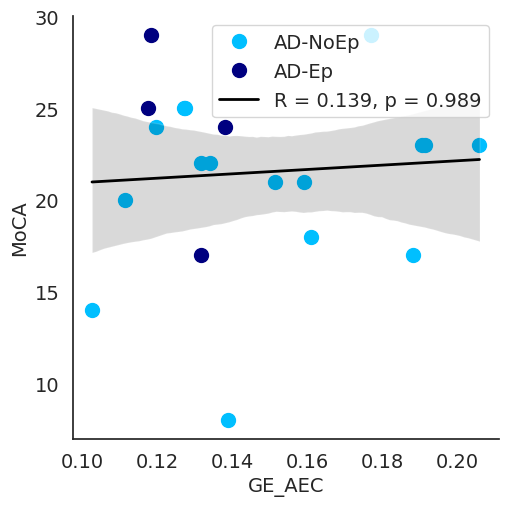

3_theta


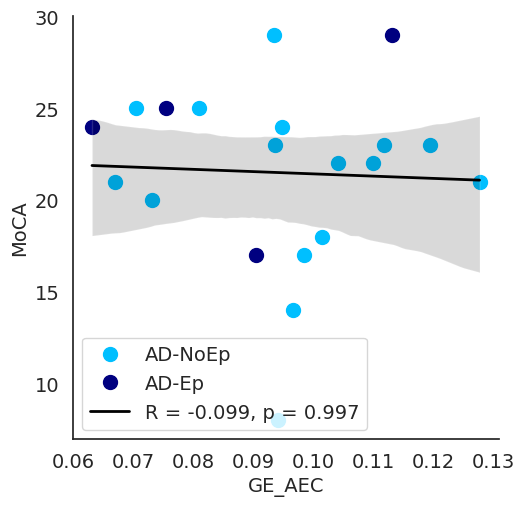

3_alpha


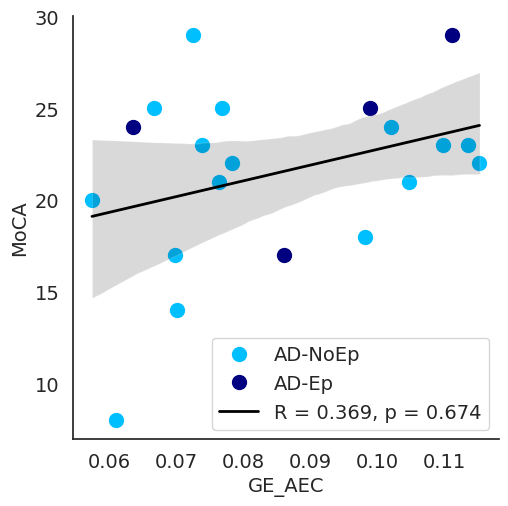

3_beta


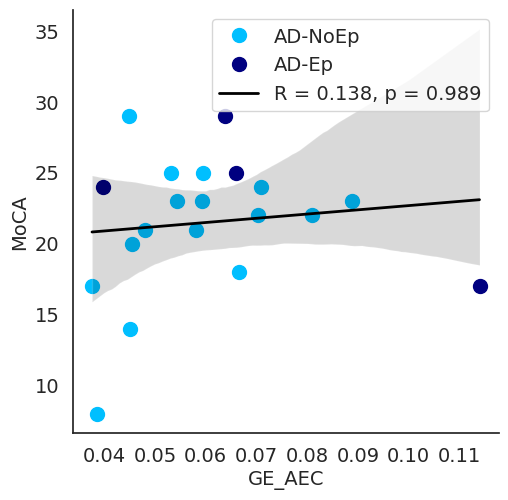

3_gamma


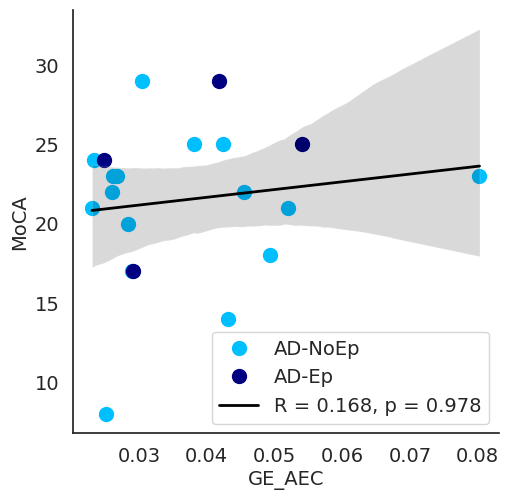

4_delta


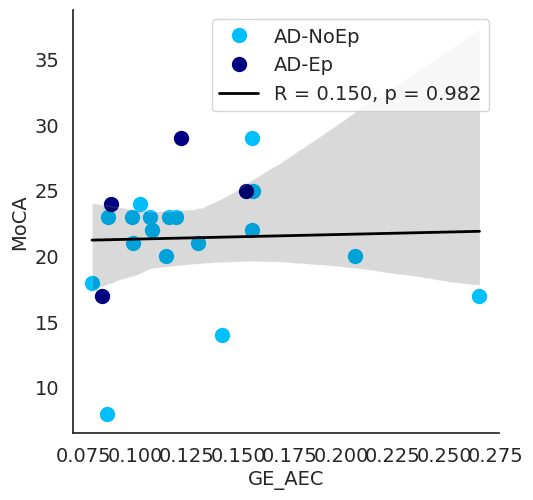

4_theta


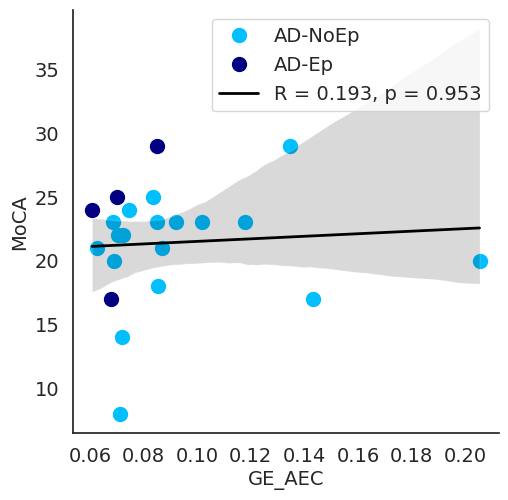

4_alpha


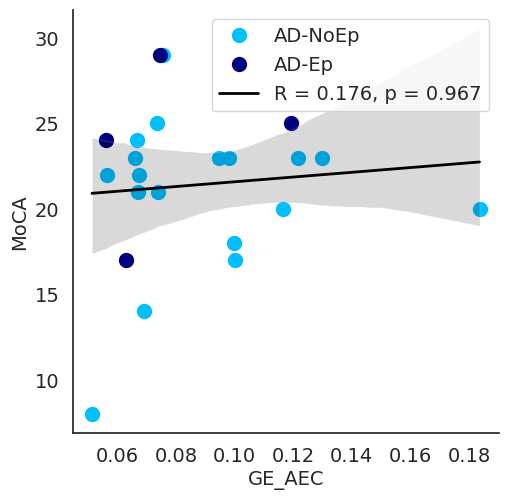

4_beta


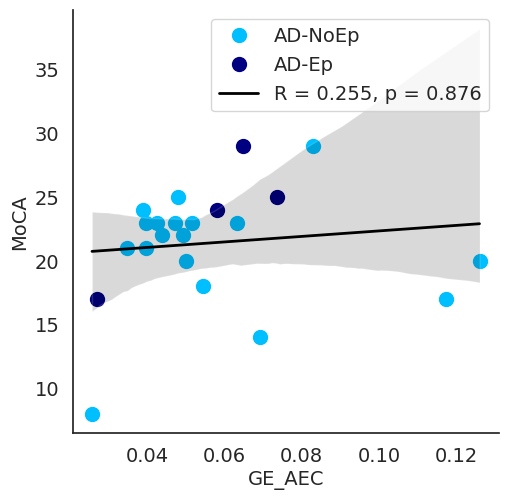

4_gamma


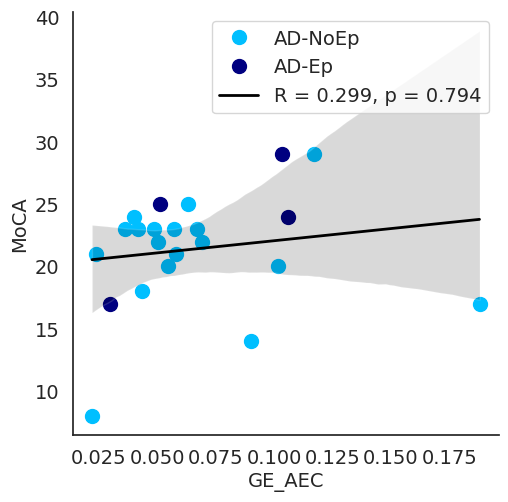

In [6]:
# Loop through stages and frequencies for GE_AEC
# Key 1_ is N2, 3_ is REM, and 4_ is gamma
for state in features.keys():
  features_df = features[state]
  print(state)
  plot_moca_vs_feature(features_df, cog_df, demographics_table, 'MoCA',
                       classes_to_include = ['AD-NoEp', 'AD-Ep'], regressor_label = 'GE_AEC', figsize=(5.5, 5.5), dot_size=100,
                      line_width=2, label_fontsize=14)

1_delta


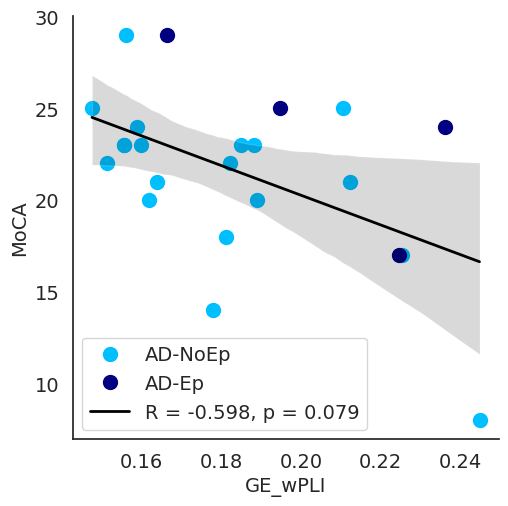

1_theta


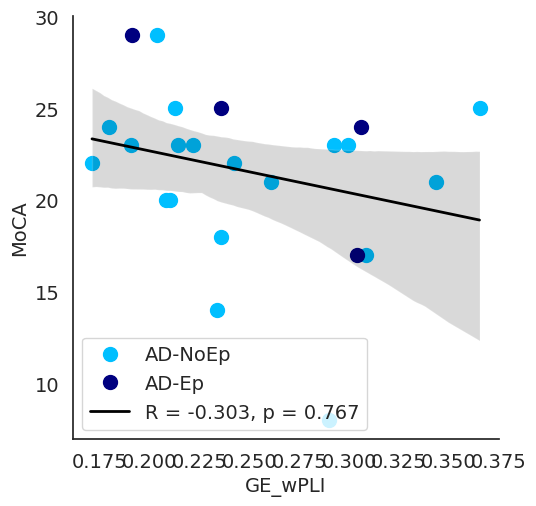

1_alpha


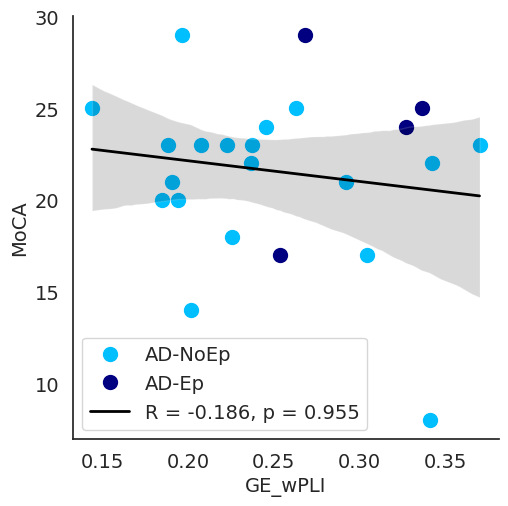

1_beta


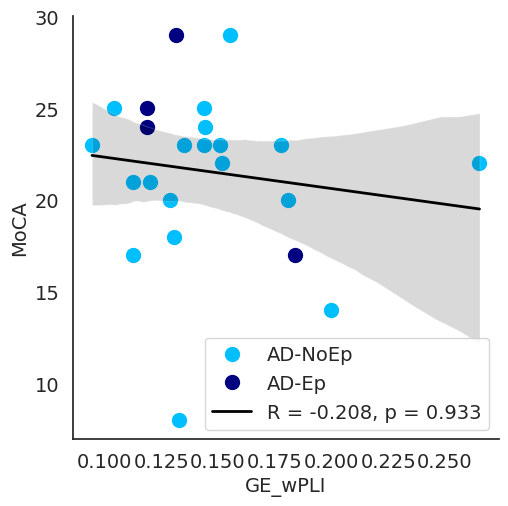

1_gamma


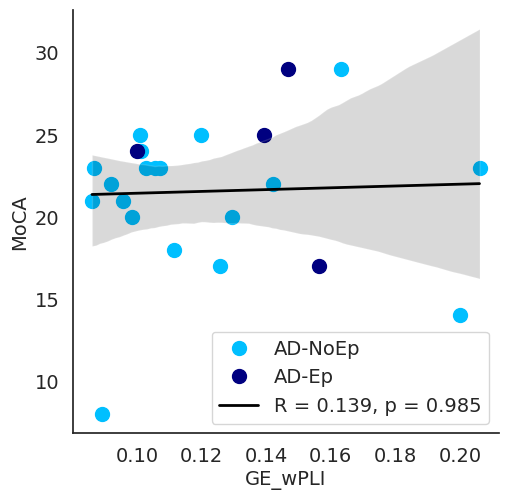

3_delta


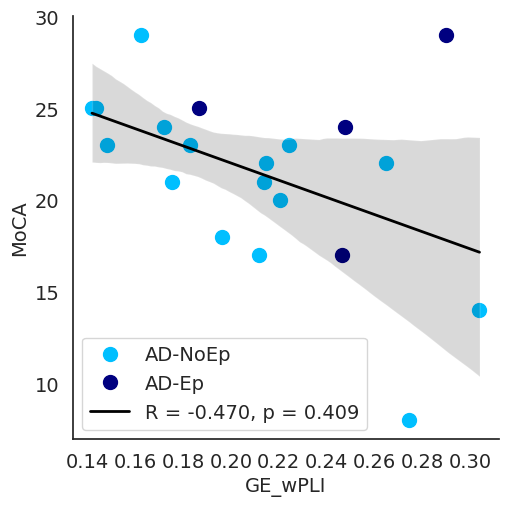

3_theta


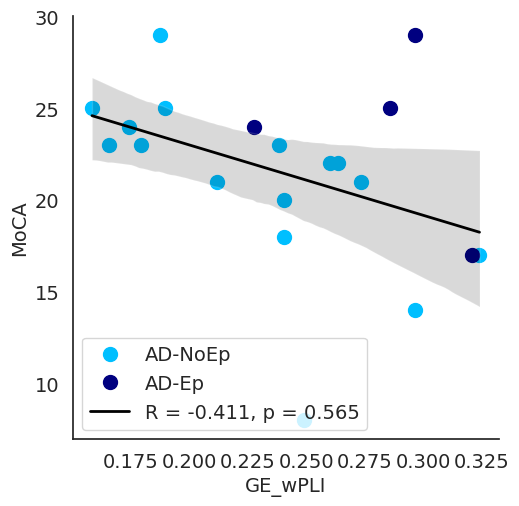

3_alpha


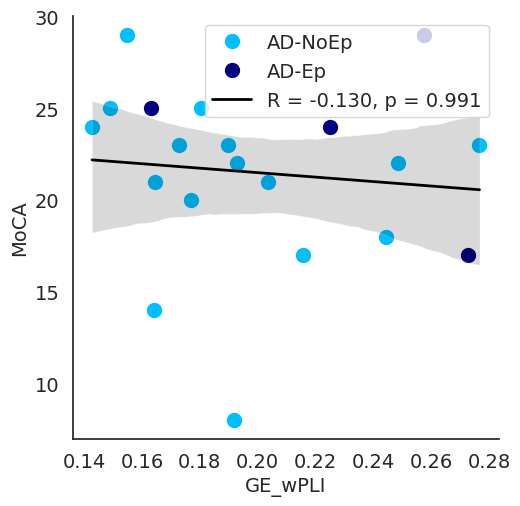

3_beta


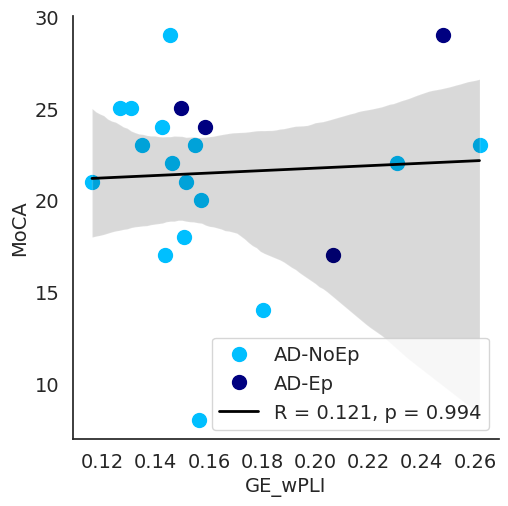

3_gamma


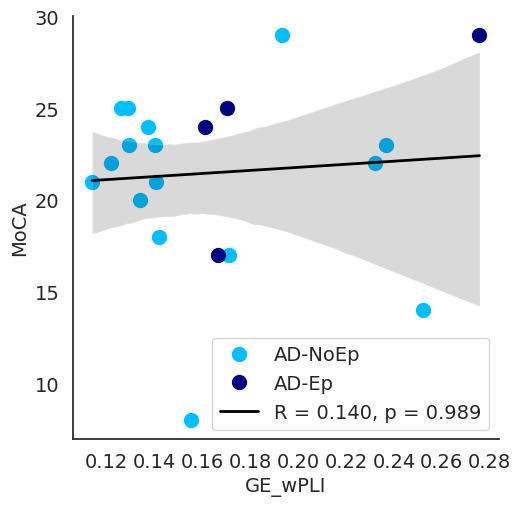

4_delta


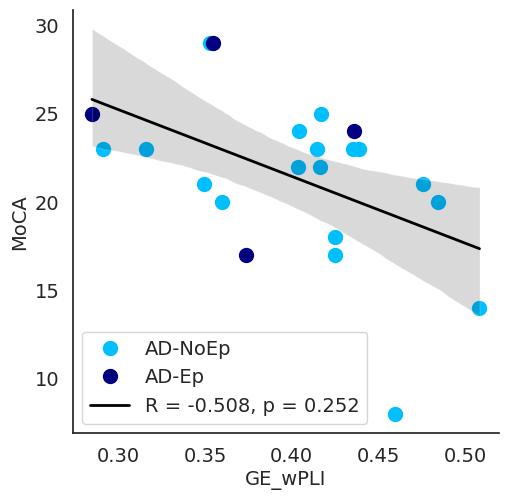

4_theta


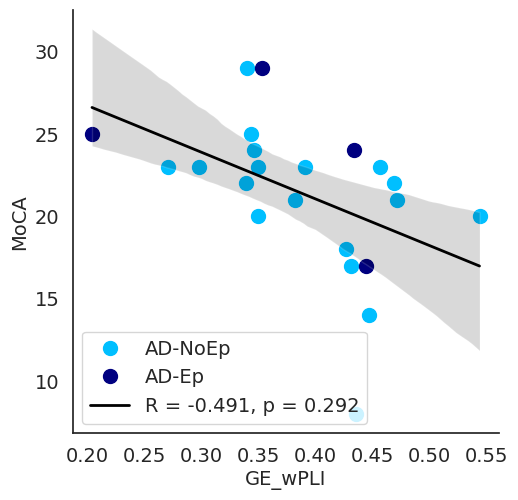

4_alpha


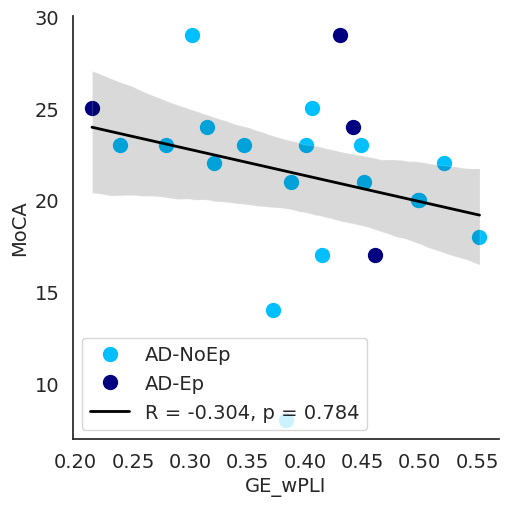

4_beta


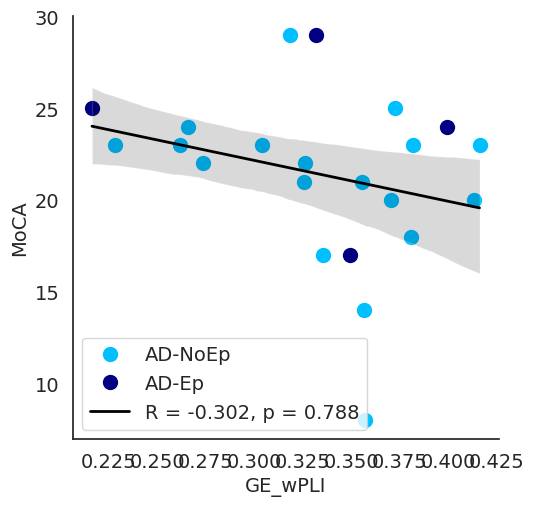

4_gamma


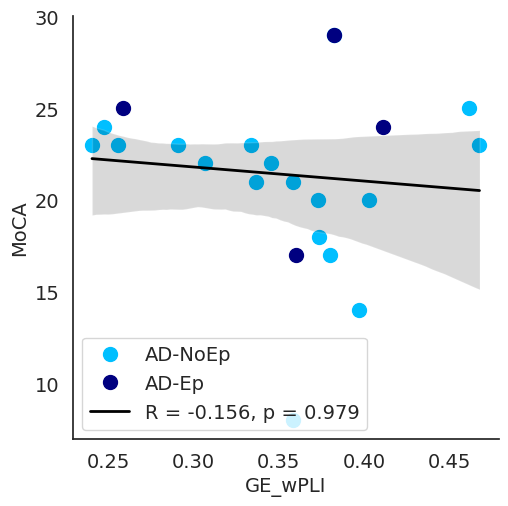

In [7]:
# Loop through stages and frequencies for GE_wPLI
for state in features.keys():
  features_df = features[state]
  print(state)
  plot_moca_vs_feature(features_df, cog_df, demographics_table, 'MoCA',
                       classes_to_include = ['AD-NoEp', 'AD-Ep'], regressor_label = 'GE_wPLI', figsize=(5.5, 5.5), dot_size=100,
                      line_width=2, label_fontsize=14)